In [1]:
import torch
import torchvision.transforms as transforms              
from torchvision.datasets import ImageFolder
import torchvision.models as models
from torchvision.models import Inception_V3_Weights
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter, raps_imagenet_real_scatter, saps_imagenet_real_scatter

# load pre-trained model InceptionV3 and set mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1).to(device)

#  Reprocess: Center Crop and then resize to 299*299
data_transform = transforms.Compose([
    transforms.CenterCrop(299),
    transforms.Resize(299), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# Temperature Scaling
model.eval() # only use output.logits of Inception's output
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=4)

model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)
model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.2

Before temperature - NLL: 1.030, ECE: 0.020
Optimal temperature: 0.959
After temperature - NLL: 1.017, ECE: 0.024


APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.7947 ± 0.0020
Final Average Prediction Set Size: 15.31 ± 0.40
Final Average Coverage: 0.8008 ± 0.0037
Final Average Real Probability: 0.6846 ± 0.0038


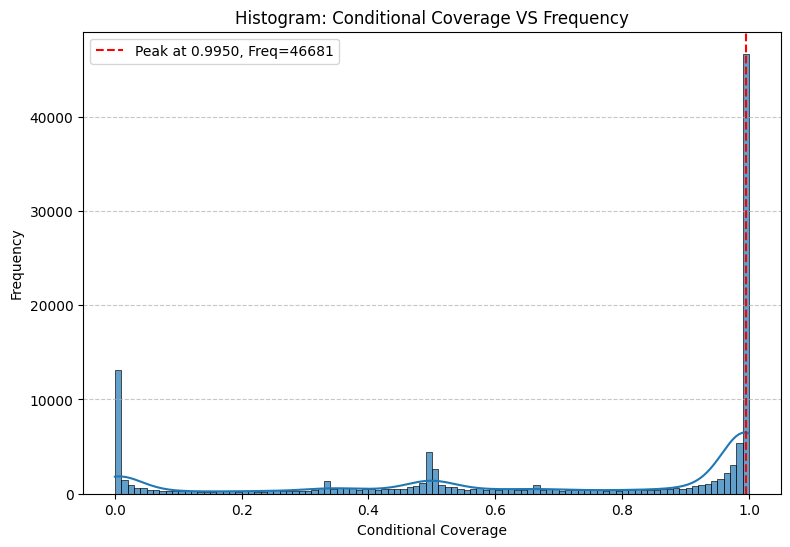

46681 (37.54%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8128 ± 0.0021
Final Average Prediction Set Size: 2.97 ± 0.03
Final Average Coverage: 0.8008 ± 0.0036
Final Average Real Probability: 0.6611 ± 0.0033


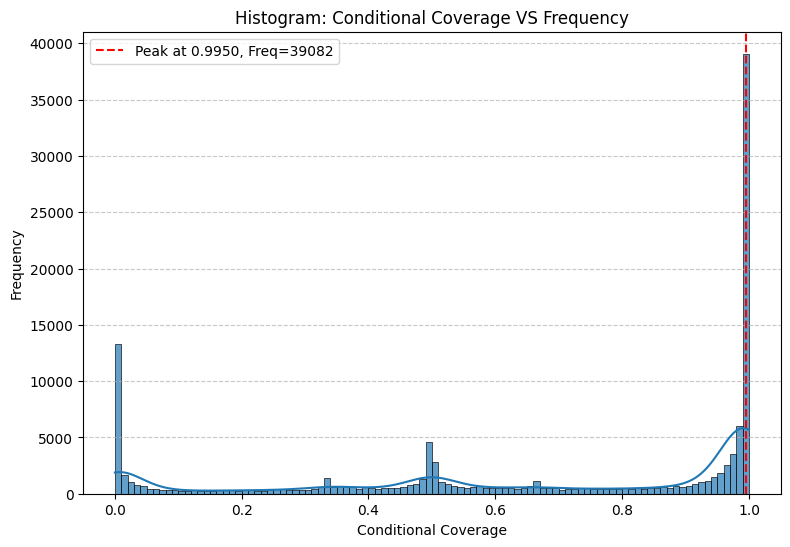

39082 (31.43%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.05, k_reg=9, num_runs=10, alpha=0.2, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8545 ± 0.0030
Final Average Prediction Set Size: 1.62 ± 0.01
Final Average Coverage: 0.7994 ± 0.0036
Final Average Real Probability: 0.6102 ± 0.0030


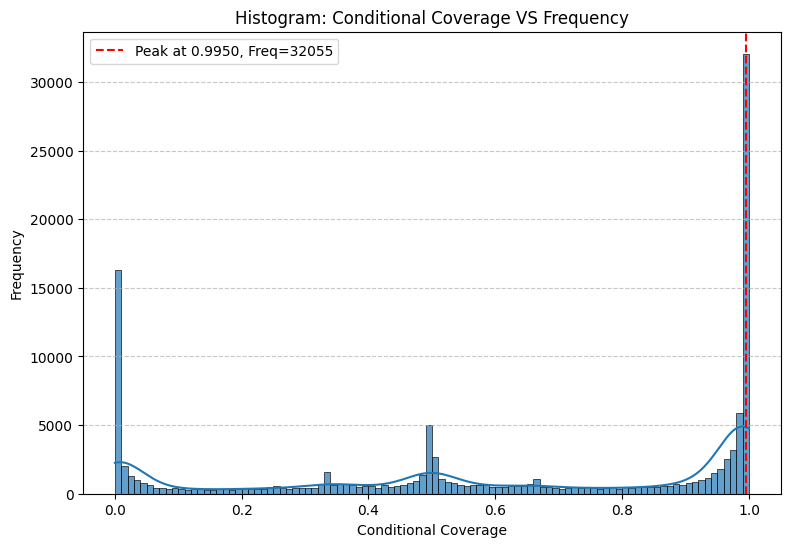

32055 (25.78%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.2, num_runs=10, alpha=0.2, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.7947 ± 0.0020
Final Average Prediction Set Size: 15.31 ± 0.40
Final Average Coverage: 0.8008 ± 0.0037
Final Average Real Probability: 0.6846 ± 0.0038


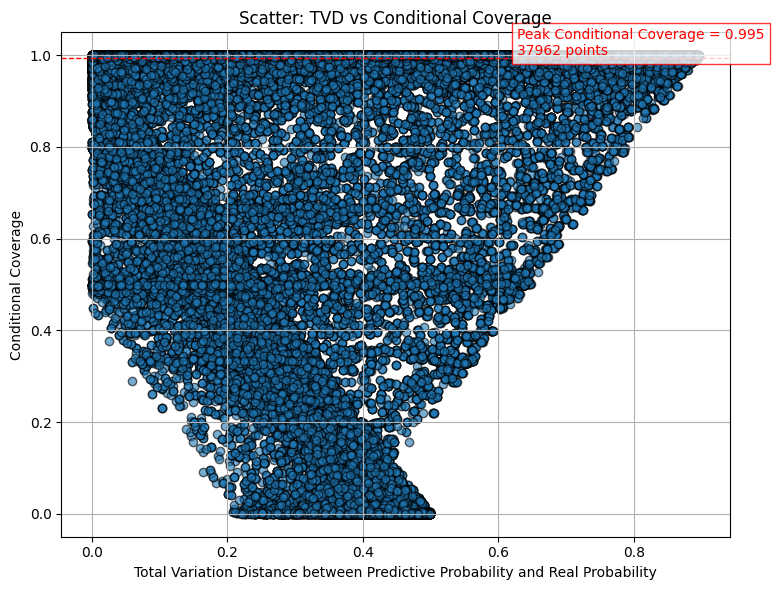

Peak Conditional Coverage = 0.995, with 37962 samples

=== Count Regions Summary ===
38357 (30.8%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
21672 (17.4%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
47372 (38.1%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.76640']
  Real Probability Set      : ['0.94944']
Sample 2:
  Predictive Probability Set: ['0.85129']
  Real Probability Set      : ['0.87128']
Sample 3:
  Predictive Probability Set: ['0.98700']
  Real Probability Set      : ['0.96266']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.79868']
  Real Probability Set      : ['0.04547']
Sample 2:
  Predictive Probability Set: ['0.19398', '0.18031', '0.07848', '0.07784', '0.07465', '0.03557', '0.02321', '0.01588', '0.01470', '0.01148', '0.01056', '0.00835', '0.00777', '0.00642', '0.00575', '0.00566', '0.00507', '

In [5]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8128 ± 0.0021
Final Average Prediction Set Size: 2.97 ± 0.03
Final Average Coverage: 0.8008 ± 0.0036
Final Average Real Probability: 0.6611 ± 0.0033


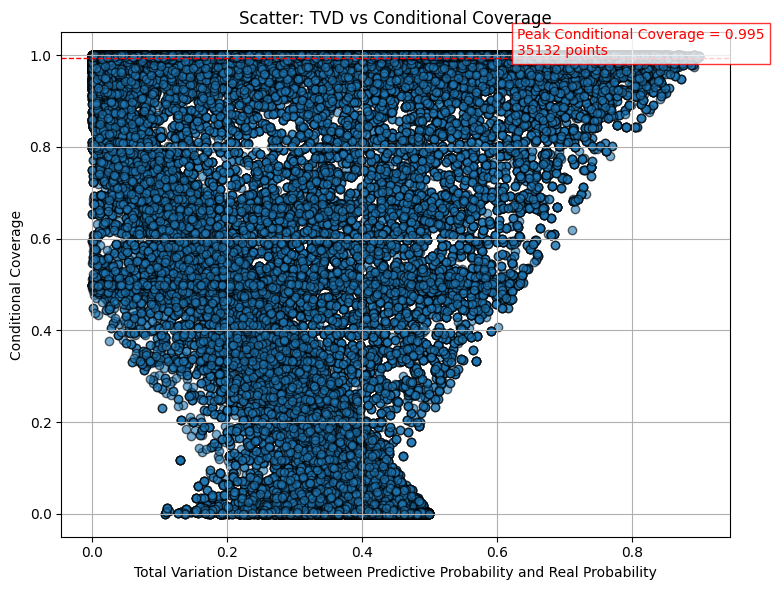

Peak Conditional Coverage = 0.995, with 35132 samples

=== Count Regions Summary ===
41801 (33.6%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
18334 (14.7%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
52803 (42.5%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.81681']
  Real Probability Set      : ['0.90254']
Sample 2:
  Predictive Probability Set: ['0.88830']
  Real Probability Set      : ['0.81186']
Sample 3:
  Predictive Probability Set: ['0.58073', '0.41842']
  Real Probability Set      : ['0.50001', '0.49999']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.45798', '0.10972', '0.03087', '0.02670', '0.02589', '0.02580', '0.02534', '0.02508', '0.01142', '0.00939']
  Real Probability Set      : ['0.00012', '0.12430', '0.00000', '0.00012', '0.00000', '0.00000', '0.06305', '0.00084', '0.00000', '0.00000']
Sample 2:

In [6]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.05, k_reg=9, num_runs=10, alpha=0.2)

SAPS Classification on CIFAR10-H(alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8545 ± 0.0030
Final Average Prediction Set Size: 1.62 ± 0.01
Final Average Coverage: 0.7994 ± 0.0036
Final Average Real Probability: 0.6102 ± 0.0030


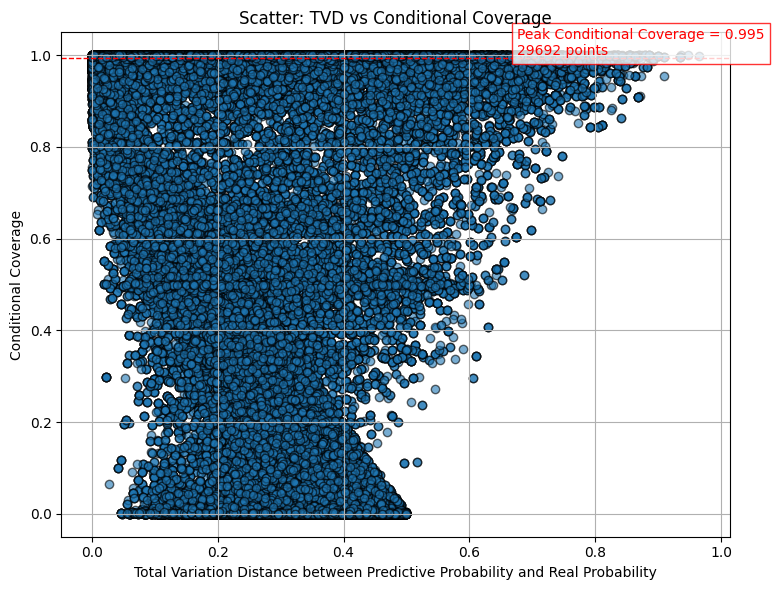

Peak Conditional Coverage = 0.995, with 29692 samples

=== Count Regions Summary ===
43825 (35.2%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
10644 (8.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
63668 (51.2%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.99081']
  Real Probability Set      : ['0.99678']
Sample 2:
  Predictive Probability Set: ['0.81645']
  Real Probability Set      : ['0.99607']
Sample 3:
  Predictive Probability Set: ['0.79827']
  Real Probability Set      : ['0.85663']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.61078', '0.13426']
  Real Probability Set      : ['0.01420', '0.00011']
Sample 2:
  Predictive Probability Set: ['0.88032']
  Real Probability Set      : ['0.07600']
Sample 3:
  Predictive Probability Set: ['0.88663']
  Real Probability Set      : ['0.03699']

--- Region 3: mediu

In [7]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.2, num_runs=10, alpha=0.2)